In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

In [2]:
# Simulating Data
n = 1000
x = np.random.normal(3, 5, size = n)
y = -15 * x + 20 + np.random.normal(0, 3, size = n) # noise -> data points wouldn't align in a line

In [3]:
print(y)

[ 2.01019057e+01 -8.84286308e+01 -2.24476829e+02 -5.81822223e+01
  8.99076617e+01 -1.08858131e+02 -1.38201976e+02 -1.54579235e+02
 -6.37244848e+01 -5.83913764e+01  6.38539619e+01  5.48204193e+01
 -8.64588912e+01 -6.72293657e+01 -1.18159796e+02 -2.38473230e+01
  1.37617656e+01  2.81704474e+01  5.06509637e+01  7.98771320e+01
  1.40156231e+02 -7.23758861e+01 -6.75278605e+01 -6.40292866e+01
 -1.70248438e+02 -8.77416085e+01 -3.51512631e+01 -9.66355131e+01
  9.16619397e+00 -2.17930425e+01  2.09603974e+01  5.15658860e+01
  1.21418174e+02  2.85072373e+01  4.13492576e+01 -5.02565897e+01
  8.37329537e+01  3.42937953e+00  5.27295164e+01 -1.13195652e+02
 -1.30401958e+01  6.71968392e-01 -6.59766499e+01  2.16134597e+00
 -7.43611943e+01  1.45654674e+01 -1.46017153e+02  8.29649350e+01
  9.61139621e+01  2.60810319e+01 -8.43549360e+01  7.97865299e+00
  7.41909088e+01  6.85267700e+01  3.27188618e+00 -4.67259067e+01
 -5.03609011e+01 -2.16497032e+01 -4.88565211e+00 -1.07823802e+02
 -1.34770858e+01 -3.53491

In [4]:
# Analytical approach for solving linear regression
X = np.sum(x)
Y = np.sum(y)
b1 = (n * np.dot(x,y) - X * Y) / (n * np.dot(x,x) - X**2)
b0 = (Y - b1 * X) / n
b1, b0 = round(b1, 2), round(b0, 2)
print(f"y = {b1} x + {b0}")

y = -15.01 x + 20.06


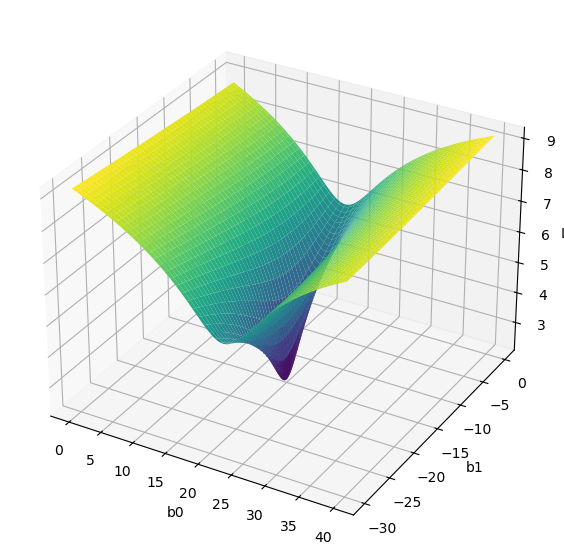

In [5]:
def MSE_loss(b0, b1, x, y):
    pred = b1 * x + b0
    loss = np.sum((pred - y) ** 2) / len(y)
    return loss

# Generate a grid of b0 and b1 values around the real b=20 and b1=-15
b0_vals = np.linspace(0, 40, 100)
b1_vals = np.linspace(-30, 0, 100)

# Calculate MSE loss for each point of this grid
# Log-scale is used only for better visualization
Z = np.zeros((len(b0_vals), len(b1_vals)))
for i in range(len(b0_vals)):
    for j in range(len(b1_vals)):
        Z[i , j] = np.log(MSE_loss(b0_vals[i], b1_vals[j], x, y))

# 3D Plot of MSE loss in log-scale
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
B0, B1 = np.meshgrid(b0_vals, b1_vals)
ax.plot_surface(B0, B1, Z, cmap='viridis')

ax.set_xlabel('b0')
ax.set_ylabel('b1')
ax.set_zlabel('Loss')
plt.show()